In [ ]:
import cv2
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt

In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/cv_assig_3/'
NUMBER_OF_IMAGES = 3

left_images, right_images = [], []
for i in range(NUMBER_OF_IMAGES):
    left_images.append(path + 'l' + str(i + 1) + '.png')
    right_images.append(path + 'r' + str(i + 1) + '.png')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dynamic Programming Disparity

In [ ]:
def dynamic_programming(img1, img2, c0=1, sigma=2):
    rows, cols = img1.shape[0], img1.shape[1]
    output = np.zeros((rows, cols), dtype=np.float128)

    dp = np.zeros((rows, cols, cols), dtype=np.float128)

    for i in range(rows):
        dp[i][0][0] = (float(img1[i][0]) - float(img2[i][0]))**2 / (sigma**2)

        # Initialize the first row and column of the dp matrix
        for j in range(1, cols):
            dp[i][j][0] = (j + 1) * c0
            dp[i][0][j] = (j + 1) * c0

    # Perform bottom-up dynamic programming
    for i in range(rows):
        for l in range(1, cols):
            for r in range(1, cols):
                cost = (float(img1[i][l]) - float(img2[i][r]))**2 / (sigma**2)
                dp[i][l][r] = min(dp[i][l-1][r-1] + cost, dp[i][l-1][r] + c0, dp[i][l][r-1] + c0)

    # Backtrack to find disparity map
    for i in range(rows):
        r, c = cols - 1, cols - 1

        while r > 0 and c > 0:
            cost = (float(img1[i][r]) - float(img2[i][c]))**2 / (sigma**2)

            if dp[i][r][c] == dp[i][r-1][c-1] + cost:
                output[i][r] = abs(r - c)
                r -= 1
                c -= 1
            elif dp[i][r][c] == dp[i][r-1][c] + c0:
                r -= 1
            elif dp[i][r][c] == dp[i][r][c-1] + c0:
                c -= 1

    return output * 255 / np.max(output)

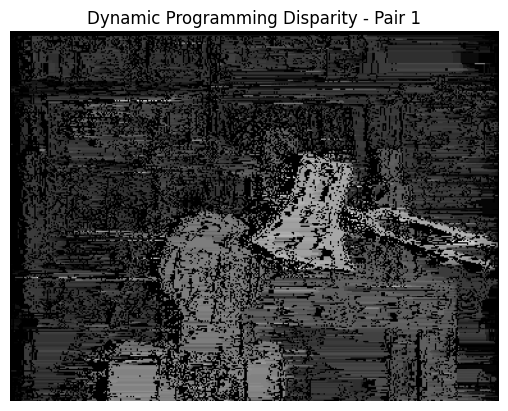

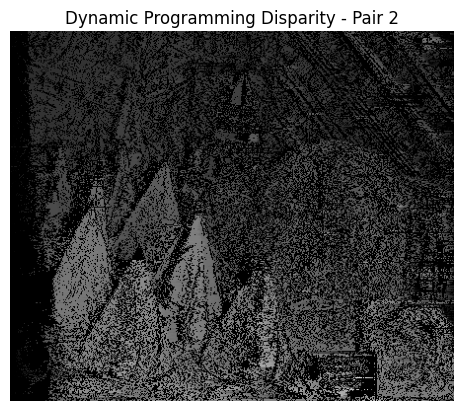

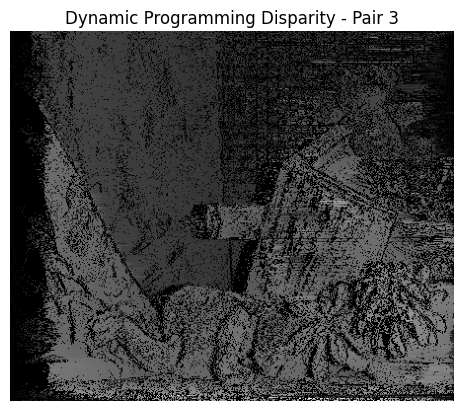

In [ ]:
# Apply bottom-up dynamic programming and display results
for i in range(NUMBER_OF_IMAGES):
    # Load images
    Il = cv2.imread(left_images[i], cv2.IMREAD_GRAYSCALE)
    Ir = cv2.imread(right_images[i], cv2.IMREAD_GRAYSCALE)

    # Apply bottom-up dynamic programming to get disparity map
    output_image = dynamic_programming(Il, Ir)

    # Display the disparity map
    plt.imshow(output_image, cmap='gray')
    plt.title(f"Dynamic Programming Disparity - Pair {i+1}")
    plt.axis('off')
    plt.show()

# Bonus

In [ ]:
output_image.shape

(375, 450)

In [ ]:
def plot_alignment(img1, img2, disparity_map):
    rows, cols = img1.shape[0], img1.shape[1]
    plt.figure(figsize=(10, 5))

    for i in range(rows):
        r, c = cols - 1, cols - 1

        while r > 0 and c > 0:
            if disparity_map[i][r] == 0:
                plt.plot([r, r], [i, i + 1], color='red', linestyle='dashed', linewidth=1)
                r -= 1
            elif disparity_map[i][r] == 1:
                plt.plot([r, r + 1], [i, i], color='blue', linestyle='dashed', linewidth=1)
                c -= 1
            else:
                plt.plot([r, r + 1], [i, i + 1], color='green', linewidth=1)
                r -= 1
                c -= 1

    plt.title('Alignment Plot: Il (vertical) vs Ir (horizontal)')
    plt.xlabel('Ir (horizontal)')
    plt.ylabel('Il (vertical)')
    plt.grid(True)
    plt.show()



In [ ]:
Il = cv2.imread(left_images[2], cv2.IMREAD_GRAYSCALE)
Ir = cv2.imread(right_images[2], cv2.IMREAD_GRAYSCALE)


plot_alignment(Il, Ir, output_image)



NameError: ignored

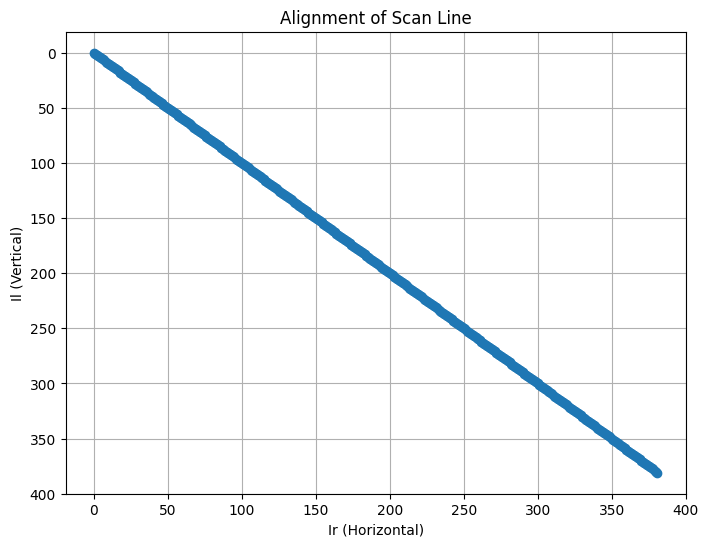